In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df_market = pd.read_csv(r"C:\Users\chidw\OneDrive\Desktop\AnythingAI\fear_greed_index.csv")
df_trader = pd.read_csv(r"C:\Users\chidw\OneDrive\Desktop\AnythingAI\historical_data.csv")

In [55]:
df_market.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [56]:
df_trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [130]:
df_trader['Account'].nunique()

32

In [57]:
df_market.shape

(2644, 4)

In [58]:
df_trader.shape

(211224, 16)

In [59]:
df_market.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [60]:
df_trader.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

In [61]:
df_market.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [62]:
df_trader.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [63]:
df_trader['Timestamp IST'] = pd.to_datetime(df_trader['Timestamp IST'])

In [64]:
df_trader['date'] = df_trader['Timestamp IST'].dt.date

In [65]:
df_market['date'] = pd.to_datetime(df_market['date']).dt.date

In [66]:
df = df_trader.merge(df_market, on='date', how='left')

In [67]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed


In [68]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

In [69]:
df = df.drop(columns=['Timestamp IST', 'timestamp', 'Timestamp'])

In [70]:
df.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
date                 object
value               float64
classification       object
dtype: object

In [71]:
df.drop(columns =['Transaction Hash', 'Order ID', 'Trade ID'], inplace=True)

In [72]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-02-12,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-02-12,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-02-12,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-02-12,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-02-12,70.0,Greed


In [73]:
df.isnull().sum()

Account                0
Coin                   0
Execution Price        0
Size Tokens            0
Size USD               0
Side                   0
Start Position         0
Direction              0
Closed PnL             0
Crossed                0
Fee                    0
date                   0
value              43367
classification     43367
dtype: int64

There are null values in value and classification of merged dataset but not in individual dataset which means "dates in the trader dataset don’t exist in the sentiment dataset". Dropping the column is best solution here to get proper insights on traders across different sentiment classificatons.

In [74]:
df = df.dropna(subset=['value', 'classification'])

In [75]:
df.Account.nunique()

32

Therefore, we are analyzing 32 traders

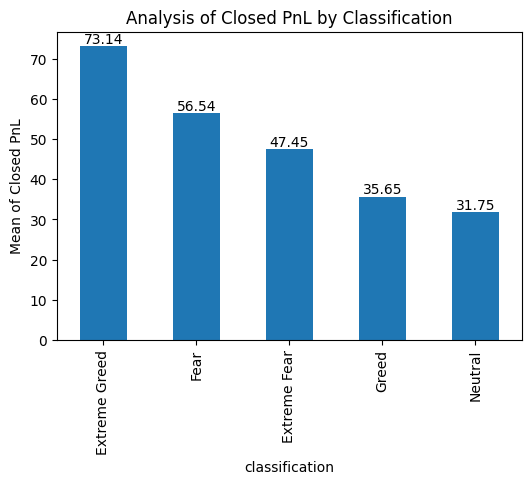

In [76]:
means = df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
ax = means.plot(kind='bar', figsize=(6, 4), title='Analysis of Closed PnL by Classification')
ax.set_ylabel('Mean of Closed PnL')
for i, val in enumerate(means):
    ax.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.show()

Closed Pnl is high in extreme greed followed by fear and low in neutral

In [77]:
from scipy.stats import pearsonr, spearmanr

sentiment_order = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

df['sentiment_score'] = df['classification'].map(sentiment_order)
pearson_corr, _ = pearsonr(df['sentiment_score'], df['Closed PnL'])
spearman_corr, _ = spearmanr(df['sentiment_score'], df['Closed PnL'])

print(f"Pearson: {pearson_corr:.3f}")
print(f"Spearman: {spearman_corr:.3f}")

Pearson: 0.004
Spearman: 0.047


In [78]:
import scipy.stats as stats

groups = [g['Closed PnL'].dropna() for name, g in df.groupby('classification')]
stat, p = stats.kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p}")

Kruskal-Wallis p-value: 3.801865728448128e-143


Although the correlation is less, from Kruskal-Wallis p-value we can say, the sentiment regime (classification) has a strong effect on trading performance (Closed PnL).

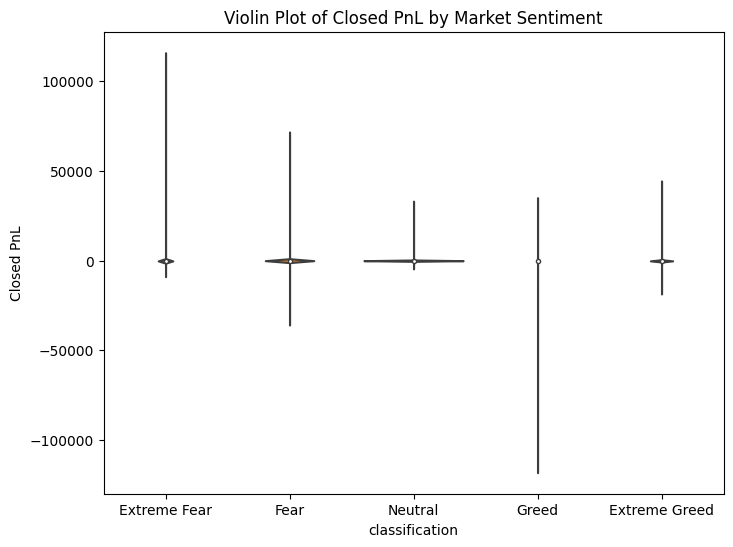

In [125]:
# Violin plot for Closed PnL by sentiment regime
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Violin Plot of Closed PnL by Market Sentiment')
plt.show()

While the typical trade outcome (median) is similar across sentiment regimes, the risk (variability and outliers) may be higher during "Greed" and "Extreme Greed" periods. 

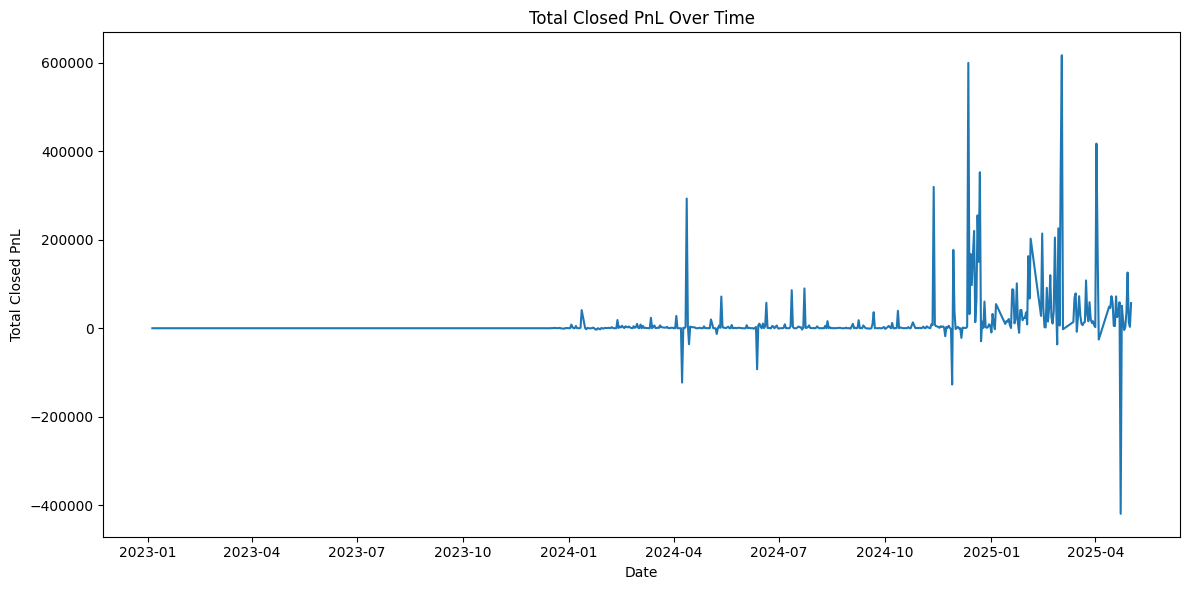

In [126]:
# Time series plot of total Closed PnL over time
df['date'] = pd.to_datetime(df['date'])
daily_pnl = df.groupby('date')['Closed PnL'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'])
plt.title('Total Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Total Closed PnL')
plt.tight_layout()
plt.show()

In [80]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', 'date',
       'value', 'classification', 'sentiment_score'],
      dtype='object')

In [81]:
def compute_trading_metrics(df, group_by='classification'):
    """
    Returns trading performance metrics grouped by sentiment or trader.
    
    group_by: 'classification' or 'Account' or ['Account', 'classification']
    """
    df = df.copy()
    df['is_win'] = df['Closed PnL'] > 0
    df['ROI'] = df['Closed PnL'] / df['Size USD']
    
    grouped = df.groupby(group_by)
    
    metrics = grouped.agg(
        Trades=('Closed PnL', 'count'),
        WinRate=('is_win', 'mean'),
        AvgPnL=('Closed PnL', 'mean'),
        TotalPnL=('Closed PnL', 'sum'),
        StdPnL=('Closed PnL', 'std'),
        AvgROI=('ROI', 'mean'),
        TotalROI=('ROI', 'sum')
    ).reset_index()
    
    # Add Sharpe Ratio
    metrics['Sharpe'] = metrics['AvgPnL'] / metrics['StdPnL']
    
    def profit_factor(sub_df):
        profit = sub_df[sub_df['Closed PnL'] > 0]['Closed PnL'].sum()
        loss = abs(sub_df[sub_df['Closed PnL'] < 0]['Closed PnL'].sum())
        return profit / loss if loss > 0 else float('inf')

    pf = grouped.apply(profit_factor).reset_index(name='ProfitFactor')
    metrics = metrics.merge(pf, on=group_by)

    def max_drawdown(sub_df):
        cumsum = sub_df['Closed PnL'].cumsum()
        running_max = cumsum.cummax()
        drawdown = running_max - cumsum
        return drawdown.max() if not drawdown.empty else 0

    dd = grouped.apply(max_drawdown).reset_index(name='MaxDrawdown')
    metrics = metrics.merge(dd, on=group_by)
    
    return metrics


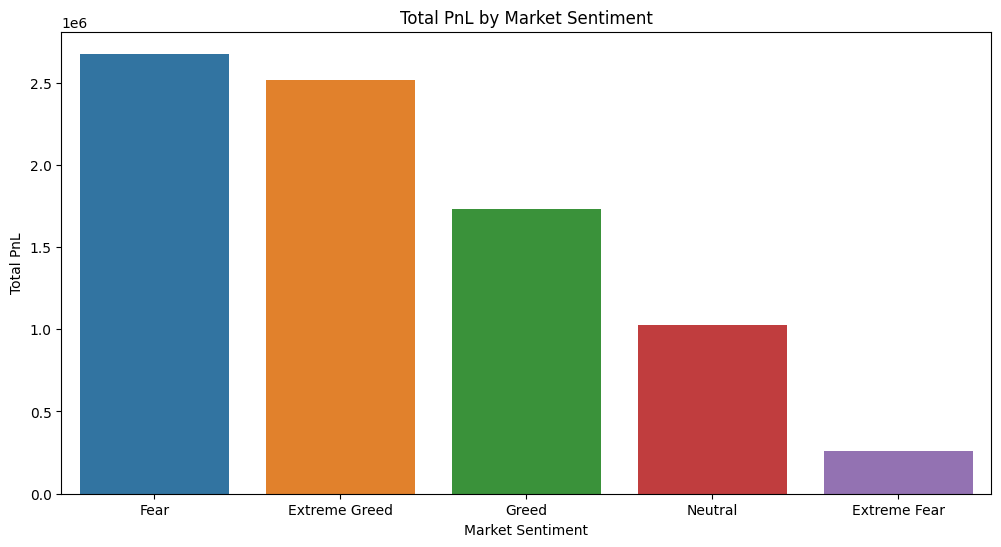

In [82]:
sentiment_metrics = compute_trading_metrics(df, group_by='classification')
trader_metrics = compute_trading_metrics(df, group_by='Account')
combo_metrics = compute_trading_metrics(df, group_by=['Account', 'classification'])
# Visualize the metrics 
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_metrics.sort_values(by='TotalPnL',ascending=False) , x='classification', y='TotalPnL')
plt.title('Total PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total PnL')     
plt.show()

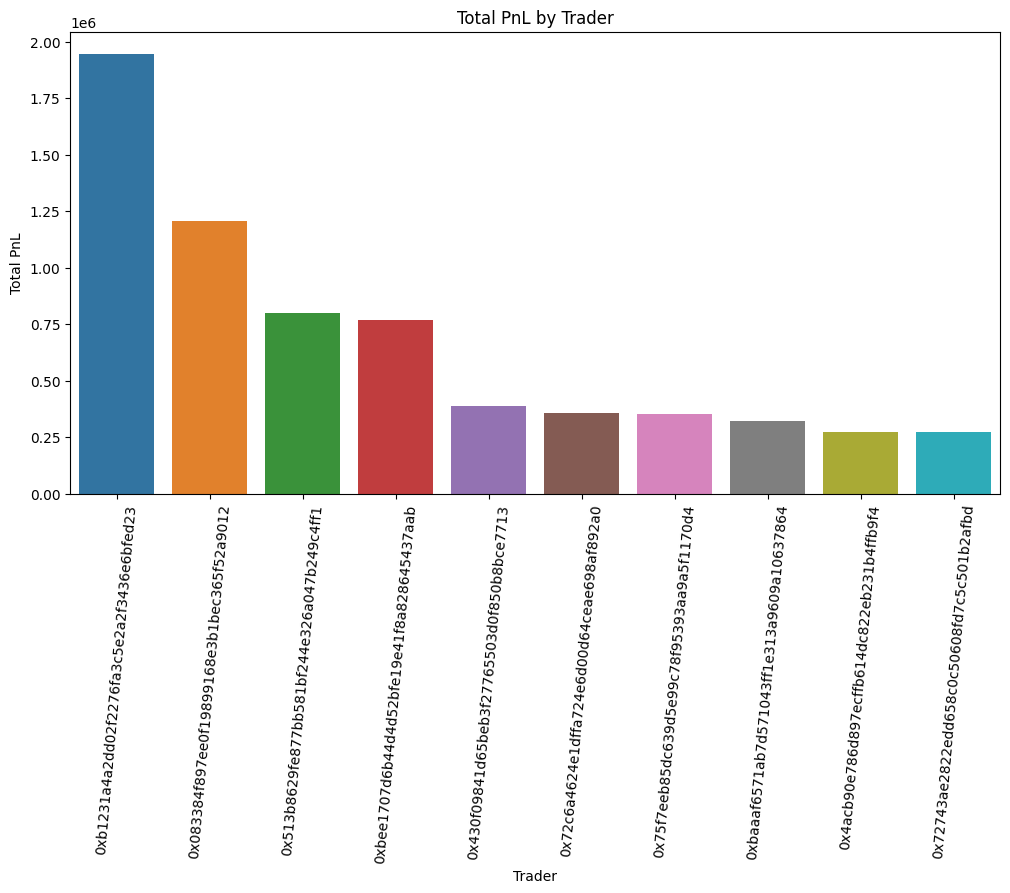

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=trader_metrics.sort_values(by='TotalPnL',ascending=False).head(10), x='Account', y='TotalPnL')
plt.title('Total PnL by Trader')
plt.xlabel('Trader')
plt.ylabel('Total PnL')
plt.xticks(rotation=85)
plt.show()

In [84]:
def get_top_combo_traders(combo_df, metric='TotalPnL', top_n=5):
    top_traders = (
        combo_df.sort_values(['classification', metric], ascending=[True, False])
        .groupby('classification')
        .head(top_n)
    )
    return top_traders
top5_combo = get_top_combo_traders(combo_metrics, metric='TotalPnL', top_n=5)

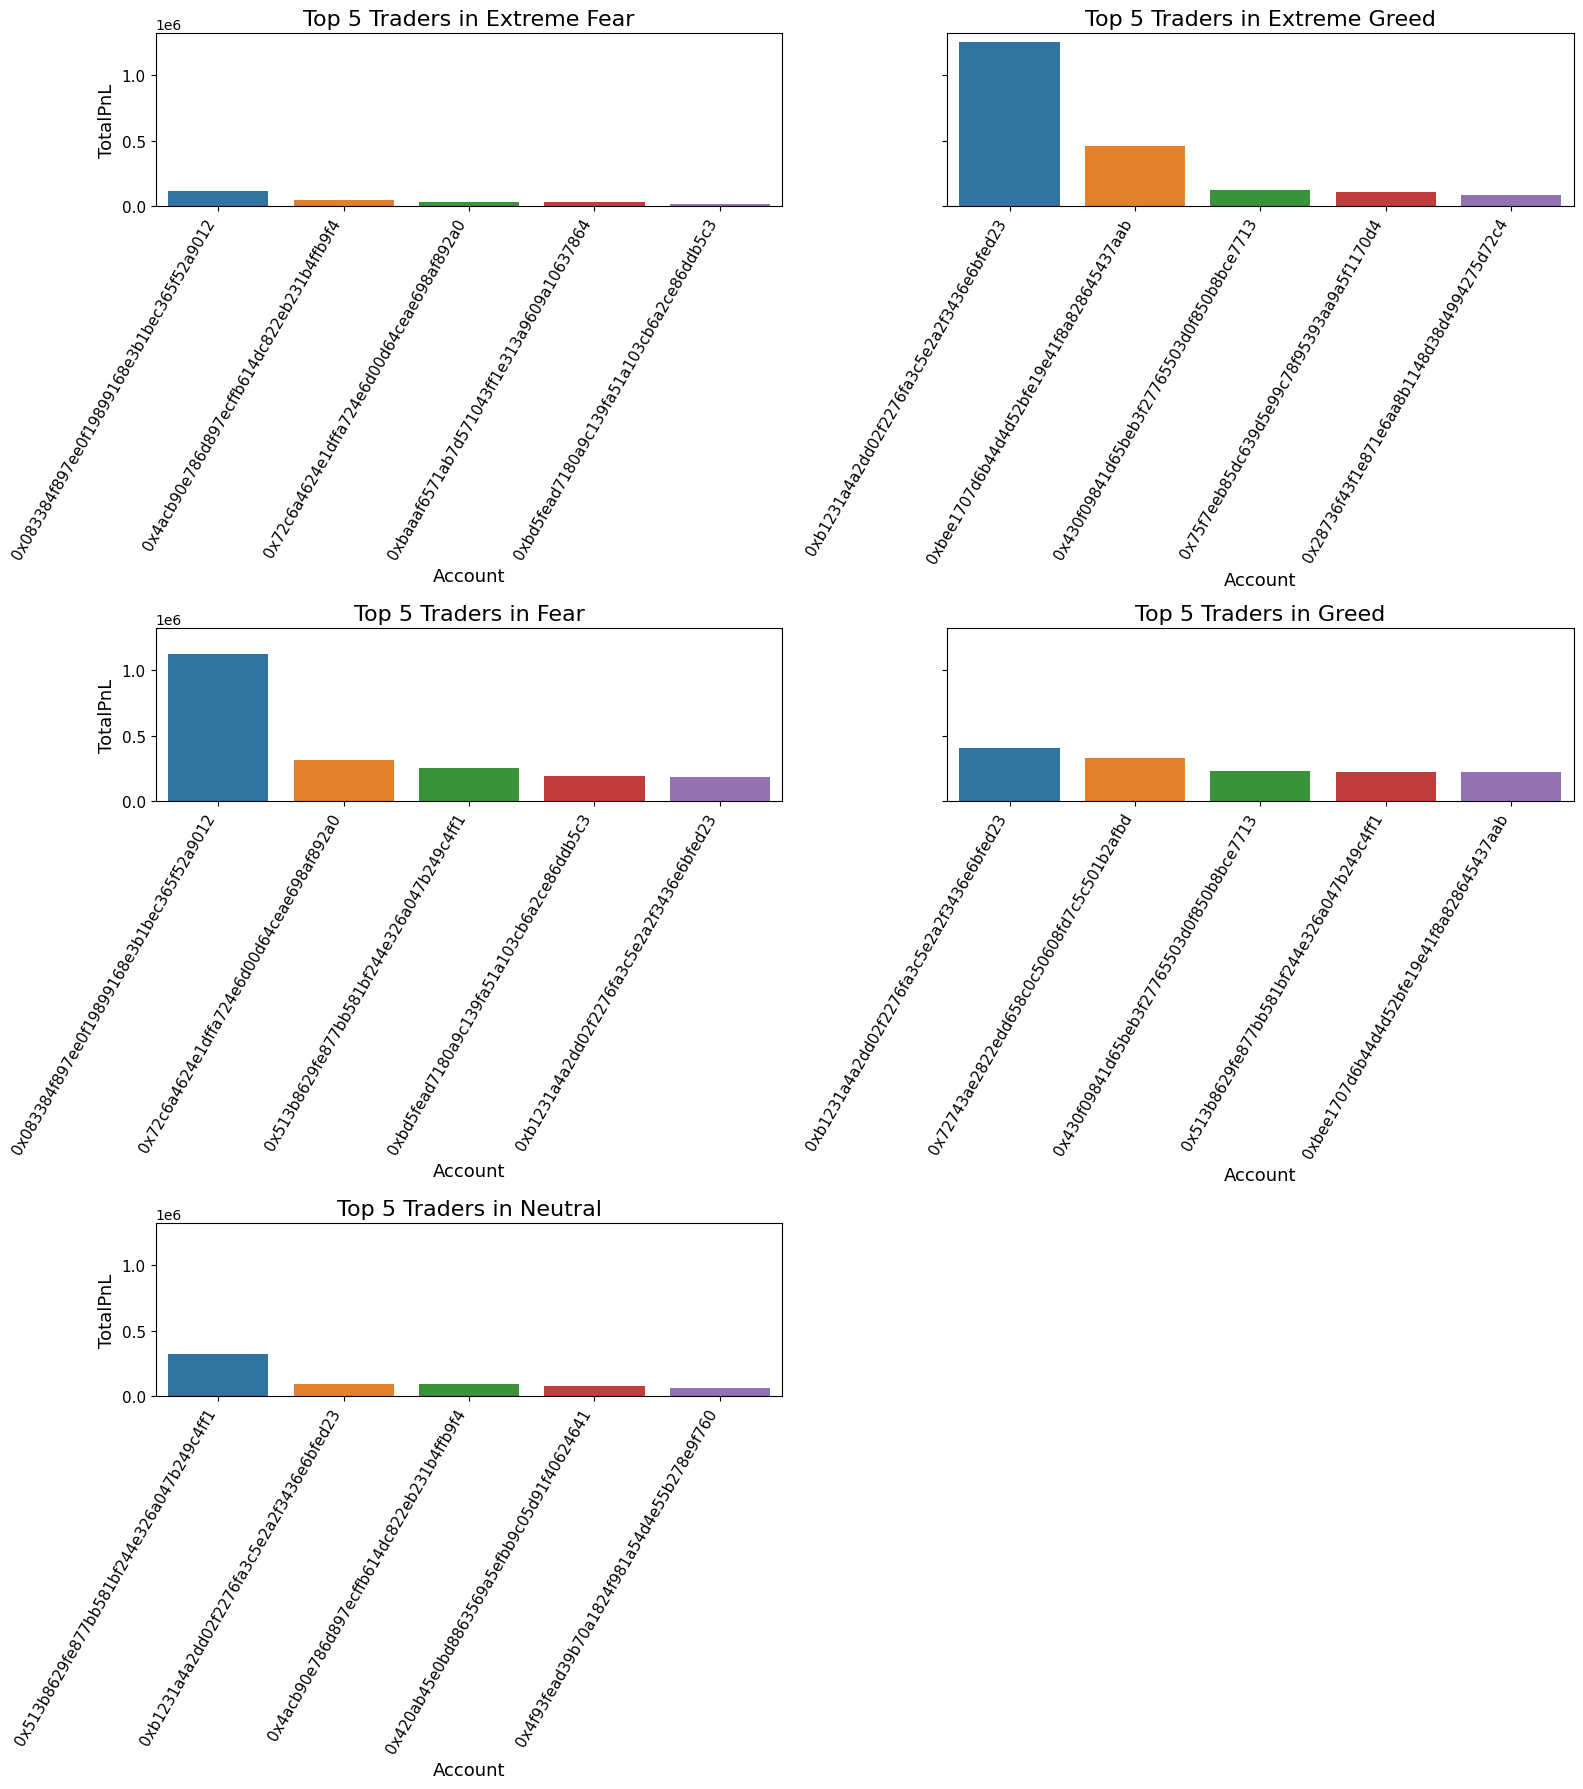

In [85]:
sentiments = top5_combo['classification'].unique()
n = len(sentiments)
ncols = 2
nrows = (n + ncols - 1) // ncols  # ensures enough rows

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 6 * nrows), sharey=True)
axes = axes.flatten()

for i, sentiment in enumerate(sentiments):
    subset = top5_combo[top5_combo['classification'] == sentiment]
    ax = axes[i]
    sns.barplot(data=subset, x='Account', y='TotalPnL', ax=ax)
    ax.set_title(f'Top 5 Traders in {sentiment}', fontsize=16)
    ax.set_xlabel('Account', fontsize=13)
    ax.set_ylabel('TotalPnL' if i % ncols == 0 else '', fontsize=13)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)
    ax.tick_params(axis='y', labelsize=11)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [86]:
# Ensure sentiment_metrics has sentiment_score
sentiment_order = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
sentiment_metrics['sentiment_score'] = sentiment_metrics['classification'].map(sentiment_order)

# List of metrics to check correlation with sentiment
metrics_to_check = ['AvgPnL', 'WinRate', 'StdPnL', 'ProfitFactor', 'Sharpe', 'MaxDrawdown', 'Trades', 'AvgROI']

correlations = {}
for metric in metrics_to_check:
    corr = sentiment_metrics[['sentiment_score', metric]].corr().iloc[0,1]
    correlations[metric] = corr

# Display correlations
print("Correlation between sentiment_score and trading outcome metrics:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.3f}")

Correlation between sentiment_score and trading outcome metrics:
AvgPnL: 0.288
WinRate: 0.830
StdPnL: -0.494
ProfitFactor: -0.000
Sharpe: 0.457
MaxDrawdown: 0.516
Trades: 0.538
AvgROI: 0.837


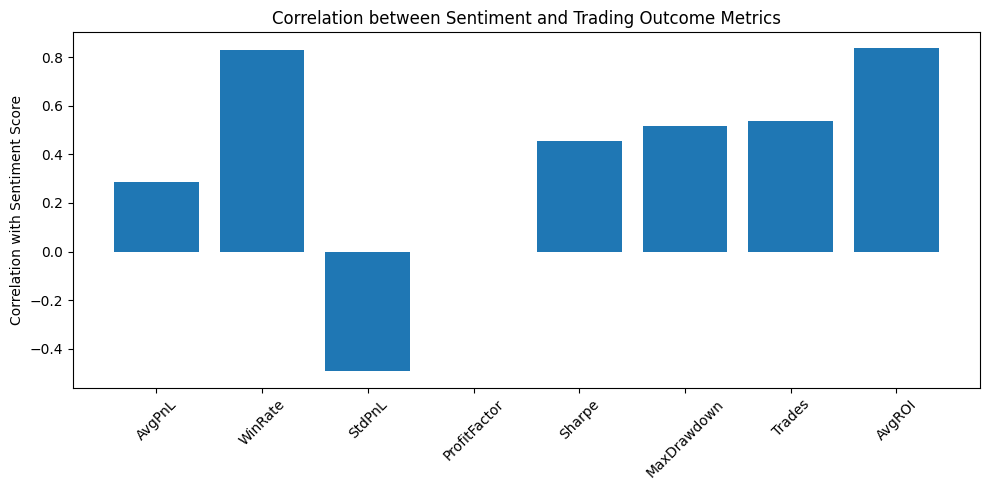

In [87]:
# Assuming 'correlations' is your dictionary from the previous correlation calculation
plt.figure(figsize=(10, 5))
plt.bar(correlations.keys(), correlations.values())
plt.ylabel('Correlation with Sentiment Score')
plt.title('Correlation between Sentiment and Trading Outcome Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

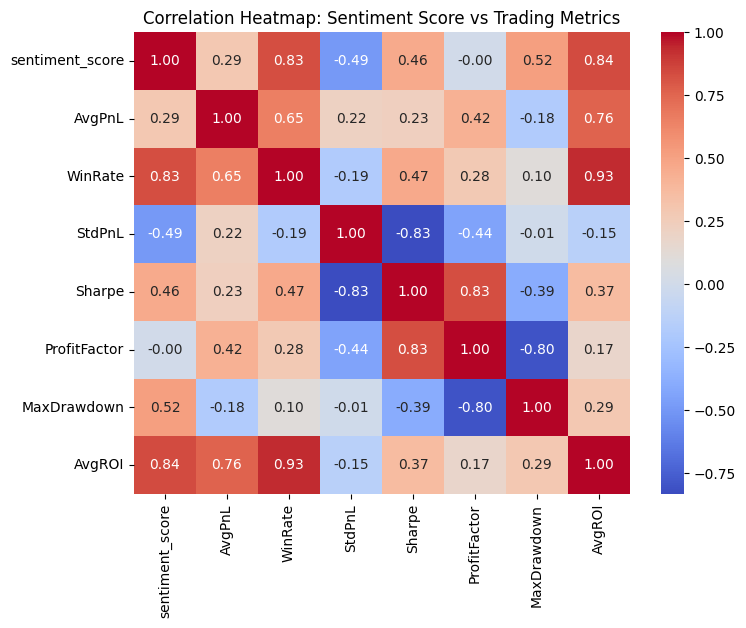

In [127]:
# Add sentiment_score to sentiment_metrics if not already present
sentiment_order = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
sentiment_metrics['sentiment_score'] = sentiment_metrics['classification'].map(sentiment_order)

# Select relevant columns for correlation
corr = sentiment_metrics[['sentiment_score', 'AvgPnL', 'WinRate', 'StdPnL', 'Sharpe', 'ProfitFactor', 'MaxDrawdown', 'AvgROI']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Sentiment Score vs Trading Metrics')
plt.show()

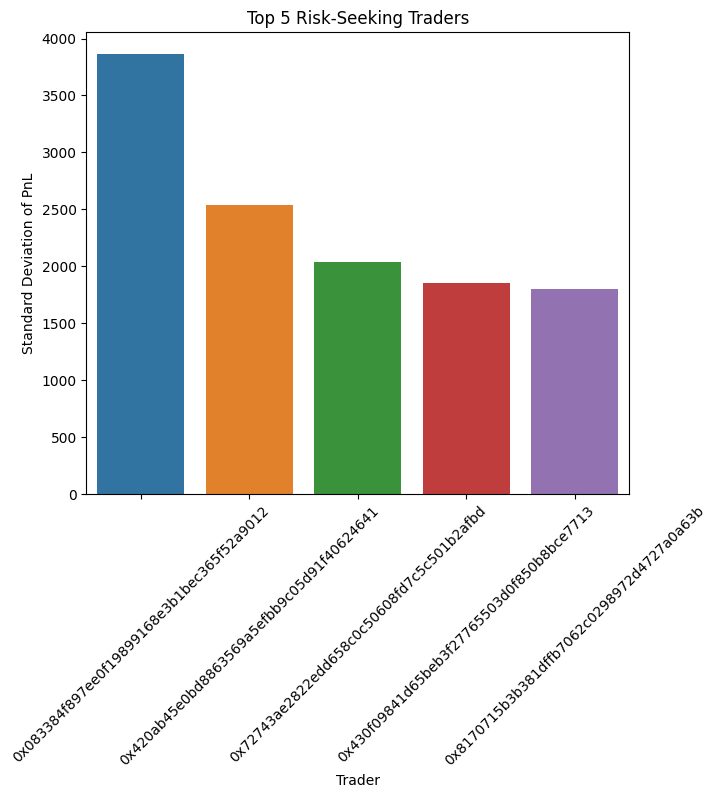

In [122]:
# Risk-seeking traders: highest StdPnL or MaxDrawdown
risk_traders = trader_metrics.sort_values('StdPnL', ascending=False).head(5)
plt.figure(figsize=(7, 6))
sns.barplot(data=risk_traders, x='Account', y='StdPnL')
plt.title('Top 5 Risk-Seeking Traders')
plt.xlabel('Trader')
plt.ylabel('Standard Deviation of PnL')
plt.xticks(rotation=45)
plt.show()

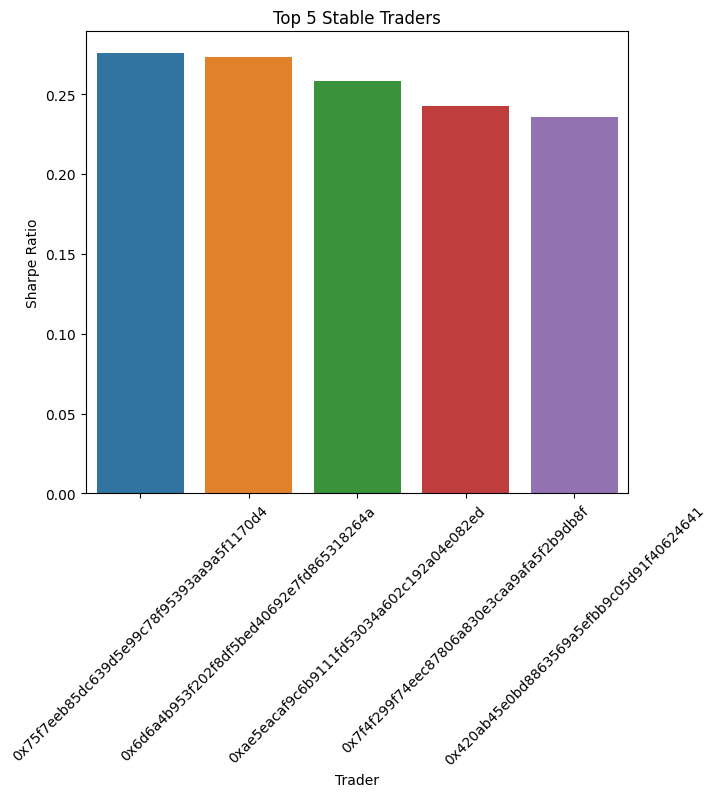

In [121]:

# Stable traders: highest Sharpe, lowest StdPnL
stable_traders = trader_metrics.sort_values('Sharpe', ascending=False).head(5)
plt.figure(figsize=(7, 6))
sns.barplot(data=stable_traders, x='Account', y='Sharpe')
plt.title('Top 5 Stable Traders')
plt.xlabel('Trader')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.show()



In [90]:
trader_stats = df.groupby(['Account', 'classification']).agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Size USD': 'sum',
    'Fee': 'sum'
}).reset_index()

# Flatten MultiIndex columns
trader_stats.columns = ['_'.join(col).strip('_') for col in trader_stats.columns.values]

# Now you can group and rank without error
trader_stats['Rank'] = trader_stats.groupby('classification')['Closed PnL_sum'].rank(ascending=False)

In [91]:
trader_stats.head()

,Account,classification,Closed PnL_mean,Closed PnL_sum,Closed PnL_count,Size USD_sum,Fee_sum,Rank
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,2096.127273,1.152870e+05,55,1372739.97,137.273975,1.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-42.626810,-4.028234e+04,945,11415855.67,1795.973591,30.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,504.956060,1.126052e+06,2230,33674859.92,3883.421052,1.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-151.066687,-4.501787e+04,298,8787994.16,920.973085,28.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,786.751910,5.035212e+04,64,2001704.46,601.046531,7.0


**TOP 5 TRADERS WITH HIGHEST CLOSED PnL ACROSS ALL SENTIMENT CLASSIFICATIONS**

In [92]:
trader_stats.groupby('Account')['Closed PnL_sum'].sum().sort_values(ascending=False).head()

Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    1.947524e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.206391e+06
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.004843e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    7.685359e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    3.881310e+05
Name: Closed PnL_sum, dtype: float64

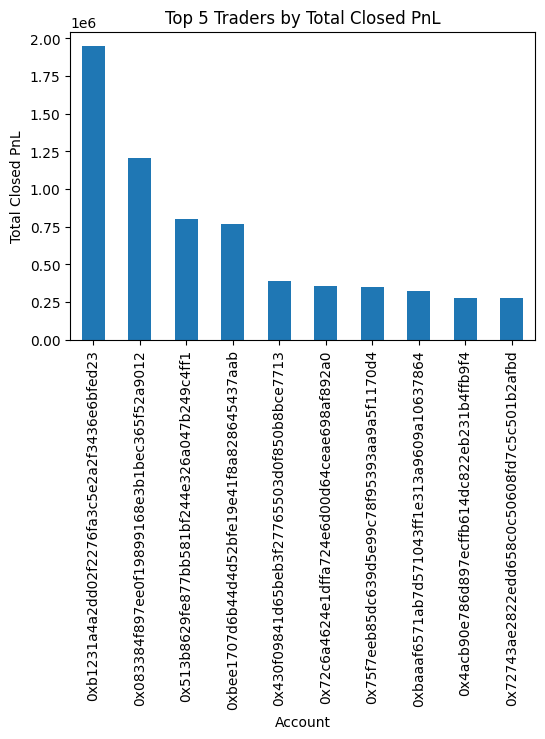

In [93]:
top_5 = trader_stats.groupby('Account')['Closed PnL_sum'].sum().sort_values(ascending=False).head(10)
ax = top_5.plot(kind='bar', figsize=(6, 4), title='Top 5 Traders by Total Closed PnL')
ax.set_ylabel('Total Closed PnL')
plt.show()

In [94]:
classification_groups = {}
for cls in trader_stats['classification'].unique():
    group = trader_stats[trader_stats['classification'] == cls]
    ranked = group.groupby('Account')['Rank'].first().reset_index().sort_values(by='Rank', ascending=True).head()
    classification_groups[cls] = ranked

In [95]:
# Pivot table: Accounts as rows, classification as columns, values as mean PnL
pivot = trader_stats.pivot_table(index='Account', columns='classification', values='Closed PnL_mean')

# Consistent performers: high mean PnL in all regimes
consistent = pivot.dropna().loc[(pivot > 0).all(axis=1)]
print("Consistent positive performers across all regimes:")
print(consistent)

Consistent positive performers across all regimes:
classification                              Extreme Fear  Extreme Greed  \
Account                                                                   
0x2c229d22b100a7beb69122eed721cee9b24011dd      5.150940      59.069977   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85      5.966690      23.788269   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    212.986053     122.730863   
0x4f93fead39b70a1824f981a54d4e55b278e9f760     44.699822       3.304861   
0x6d6a4b953f202f8df5bed40692e7fd865318264a     14.901568     412.793781   
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     61.663224      44.452713   
0xa0feb3725a9335f49874d7cd8eaad6be45b27416      4.396778      13.666356   
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb    252.500000      27.507620   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23      6.831415     684.181428   
0xbee1707d6b44d4d52bfe19e41f8a828645437aab      2.878163      75.413909   

classification                                  

In [96]:
consistent.shape

(10, 5)

10 traders who are consistent accross all the sentiment regimes.

In [97]:
consistent['mean_across_regimes'] = consistent.mean(axis=1)
sorted_consistent = consistent.sort_values(by='mean_across_regimes', ascending=False)
top_5_consistent_traders = sorted_consistent.head()

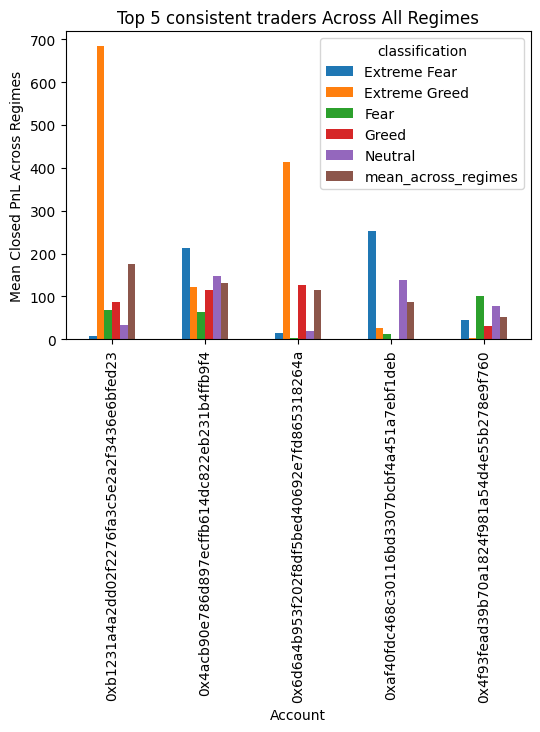

In [98]:
ax = top_5_consistent_traders.plot(kind='bar', figsize=(6, 4), title='Top 5 consistent traders Across All Regimes') 
ax.set_ylabel('Mean Closed PnL Across Regimes')
plt.show()

In [99]:
pivot.isnull().sum() #move this and the below cell up

classification
Extreme Fear     8
Extreme Greed    2
Fear             0
Greed            1
Neutral          1
dtype: int64

Leaving the Nan without filling them with 0 is the best option to analyze the traders. It will lets us know that some traders are not active in some sentiment regimes.

In [100]:
# Contrarian: positive PnL in 'Fear' or 'Extreme Fear'
contrarian = pivot[(pivot['Extreme Fear'] > 0) & (pivot['Fear'] > 0)]
print("Contrarian performers (positive PnL in Extreme Fear):")
print(contrarian[['Extreme Fear', 'Fear']])

Contrarian performers (positive PnL in Extreme Fear):
classification                              Extreme Fear        Fear
Account                                                             
0x083384f897ee0f19899168e3b1bec365f52a9012   2096.127273  504.956060
0x2c229d22b100a7beb69122eed721cee9b24011dd      5.150940    8.520507
0x47add9a56df66b524d5e2c1993a43cde53b6ed85      5.966690    9.636811
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    212.986053   63.280540
0x4f93fead39b70a1824f981a54d4e55b278e9f760     44.699822  100.670431
0x6d6a4b953f202f8df5bed40692e7fd865318264a     14.901568    3.201823
0x72c6a4624e1dffa724e6d00d64ceae698af892a0   1410.794152  689.551175
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     61.663224   34.290075
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f     36.068831   38.900950
0x8170715b3b381dffb7062c0298972d4727a0a63b     59.522427  112.822313
0x8477e447846c758f5a675856001ea72298fd9cb5      5.919739    5.857330
0xa0feb3725a9335f49874d7cd8eaad6be45b27416      4

In [101]:
contrarian.shape

(18, 5)

18 traders perform well during extreme fear and fear conditions

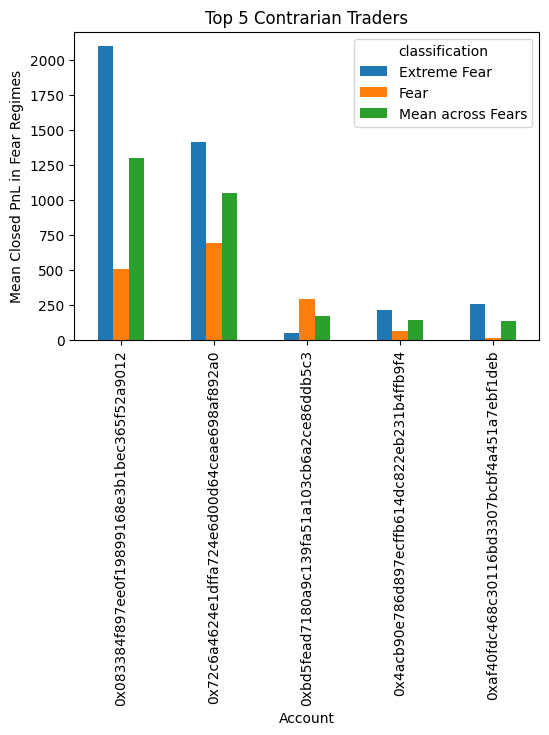

In [102]:
contrarian = contrarian[['Extreme Fear', 'Fear']]
contrarian['Mean across Fears'] = contrarian.mean(axis=1)
contrarian = contrarian.sort_values(by='Mean across Fears', ascending=False)
ax = contrarian.head().plot(kind='bar', figsize=(6, 4), title='Top 5 Contrarian Traders')
ax.set_ylabel('Mean Closed PnL in Fear Regimes')
plt.show()